# Import libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import seaborn as sns

import pickle
import warnings
warnings.filterwarnings('ignore')
!pip install neattext
import neattext.functions as nfx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 5.1 MB/s eta 0:00:00


In [3]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
import glob
import cv2
import numpy as np
import matplotlib.pyplot  as plt 
from scipy.signal import convolve2d
import scipy.misc
import scipy.ndimage
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import precision_score, confusion_matrix,recall_score, f1_score, cohen_kappa_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from scipy.signal import convolve2d
import scipy.misc
import scipy.ndimage
from scipy import stats

import matplotlib.pyplot as plt

# Loading Data


In [6]:
#train data
train_data=pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt'
                 , sep=':::',engine='python',names=['Title','Genre','Description'])
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
train_data['Genre'].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [8]:
train_data['Genre'].value_counts().index.values


array([' drama ', ' documentary ', ' comedy ', ' short ', ' horror ',
       ' thriller ', ' action ', ' western ', ' reality-tv ', ' family ',
       ' adventure ', ' music ', ' romance ', ' sci-fi ', ' adult ',
       ' crime ', ' animation ', ' sport ', ' talk-show ', ' fantasy ',
       ' mystery ', ' musical ', ' biography ', ' history ',
       ' game-show ', ' news ', ' war '], dtype=object)

In [9]:
#test_Data
#have no attribute Gener

test_path='/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt'
test_data=pd.read_csv( test_path , sep=':::',engine='python',names=['ID', 'Title','Description'])
test_data.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


selected_features['Diagnosis']# Data visualizations

Text(0, 0.5, 'Genre')

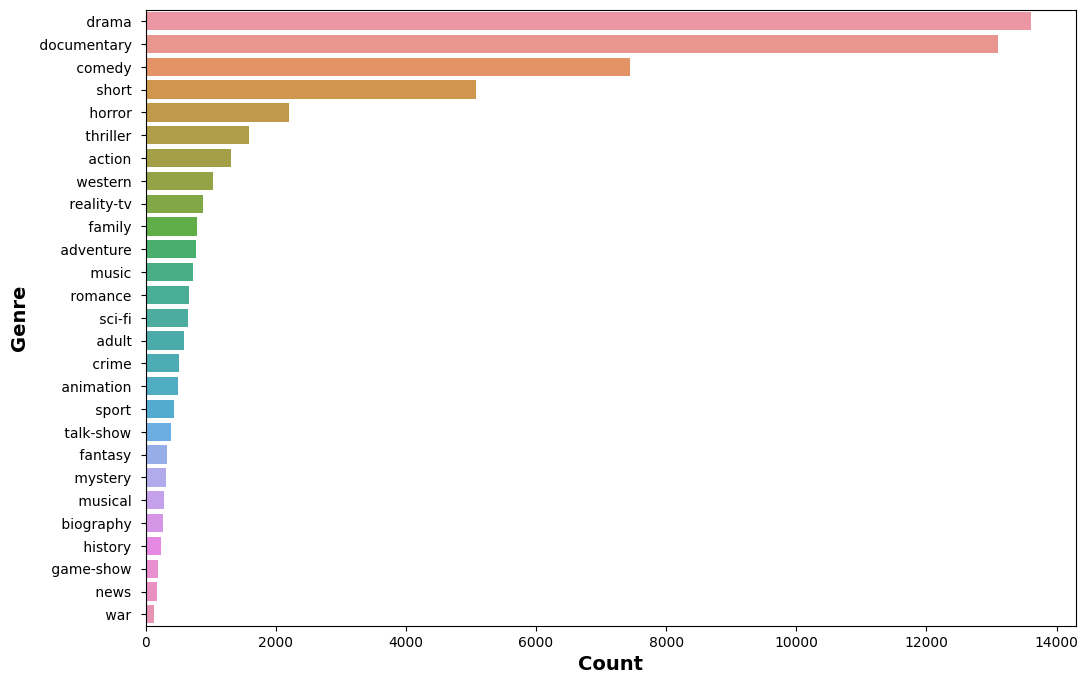

In [10]:
plt.figure(figsize=(12,8))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts, y=counts.index)  
plt.xlabel('Count',fontsize=14, fontweight='bold')
plt.ylabel('Genre',fontsize=14, fontweight='bold')

# Cleaning data

In [11]:
def clean_text(text):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
#         sent=nfx.remove_shortwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

In [12]:
orginal_train_lengths = train_data['Description'].apply(len)
orginal_test_lengths = test_data['Description'].apply(len)

In [13]:
cleaned_train_text,train_text_length=clean_text(train_data.Description)
cleaned_test_text,test_text_length=clean_text(test_data.Description)

100%|██████████| 54200/54200 [00:02<00:00, 21045.68it/s]


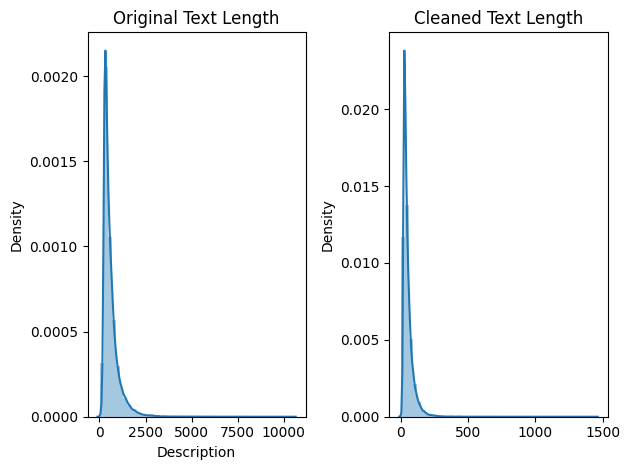

In [14]:
#  text length distribution before Cleaning
plt.subplot(1, 2, 1)
sns.distplot(orginal_train_lengths)
plt.title('Original Text Length')
#  text length distribution after cleaning
plt.subplot(1, 2, 2)
sns.distplot(train_text_length)
plt.title('Cleaned Text Length')

plt.tight_layout()
plt.show()

In [15]:

train_data['original_len'] = orginal_train_lengths
test_data['original_len'] = orginal_test_lengths

train_data['Text_cleaning'] = cleaned_train_text
test_data['Text_cleaning'] = cleaned_test_text

train_data['cleaned_len'] = train_text_length
test_data['cleaned_len'] = test_text_length

train_data.head()

,Title,Genre,Description,original_len,Text_cleaning,cleaned_len
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parents 10yearol...,47
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...,14
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empties students field trip museum natural...,48
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father ends meet edith twin si...,105
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films title refers unrecovered bodies ground z...,52


In [16]:
test_data.head()

,ID,Title,Description,original_len,Text_cleaning,cleaned_len
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",510,lr brane loves life car apartment job especial...,43
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",674,spain march 1964 quico naughty child belonging...,59
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,590,year life albin family shepherds north transyl...,52
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",681,father died hasnt spoken brother 10 years canc...,59
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,814,known internationally martial arts superstar b...,88


# TF-IDF technique

In [17]:
test_path='/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt'
test_data_solution=pd.read_csv( test_path , sep=':::',engine='python',names=['ID','Title','Genre','Description'])
test_data_solution.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [19]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC



# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(cleaned_train_text)

# Transform the testing data
X_test_tfidf = vectorizer.transform(cleaned_test_text)

#LabelEncoder
lbl_target=LabelEncoder()
y_train=lbl_target.fit_transform(train_data['Genre'])
y_test=lbl_target.transform(test_data_solution['Genre'])

#  Support Vector Classifier 

In [20]:
# Train a Linear Support Vector Classifier (SVC) model
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the testing data
accuracy = model.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)  

Accuracy: 0.586309963099631


In [30]:
y_pred = model.predict(X_test_tfidf) 

In [31]:
evaluate(y_test,y_pred)

Accuracy 0.586309963099631
Classification Report               precision    recall  f1-score   support

           0       0.42      0.33      0.37      1314
           1       0.65      0.40      0.49       590
           2       0.51      0.21      0.30       775
           3       0.43      0.13      0.20       498
           4       0.00      0.00      0.00       264
           5       0.54      0.59      0.56      7446
           6       0.27      0.06      0.09       505
           7       0.69      0.83      0.75     13096
           8       0.56      0.72      0.63     13612
           9       0.40      0.15      0.22       783
          10       0.33      0.07      0.12       322
          11       0.81      0.64      0.72       193
          12       0.35      0.02      0.05       243
          13       0.61      0.64      0.63      2204
          14       0.64      0.54      0.59       731
          15       0.35      0.07      0.12       276
          16       0.28      0.0

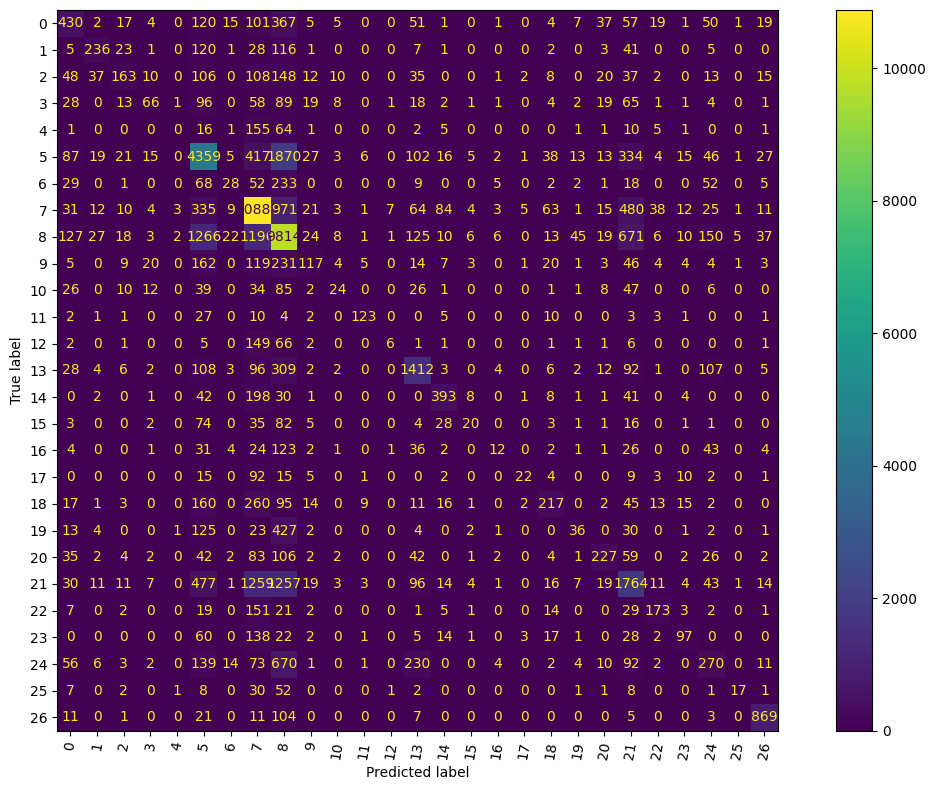

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

#  Logistic Regression

In [22]:
 #Using Logistic Regression Algorithm to the Training Setfrom sklearn.linear_model import LogisticRegression
classifierlr = LogisticRegression(penalty='l2', solver='liblinear')
classifierlr.fit(X_train_tfidf, y_train)
grid_predictionslr = classifierlr.predict(X_test_tfidf) 



In [39]:
# Evaluate the model on the testing data
accuracy = classifierlr.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)  

Accuracy: 0.5810147601476015


In [24]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    cf_report = classification_report(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    
    print('Accuracy', accuracy)
    print('Classification Report', cf_report)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

In [25]:
evaluate(y_test,grid_predictionslr)

Accuracy 0.5810147601476015
Classification Report               precision    recall  f1-score   support

           0       0.56      0.22      0.31      1314
           1       0.60      0.16      0.26       590
           2       0.75      0.13      0.22       775
           3       0.58      0.01      0.03       498
           4       0.00      0.00      0.00       264
           5       0.54      0.57      0.56      7446
           6       0.58      0.01      0.03       505
           7       0.64      0.89      0.74     13096
           8       0.53      0.81      0.64     13612
           9       0.62      0.05      0.09       783
          10       1.00      0.01      0.01       322
          11       0.93      0.47      0.63       193
          12       0.00      0.00      0.00       243
          13       0.67      0.55      0.61      2204
          14       0.74      0.34      0.46       731
          15       0.00      0.00      0.00       276
          16       0.00      0.

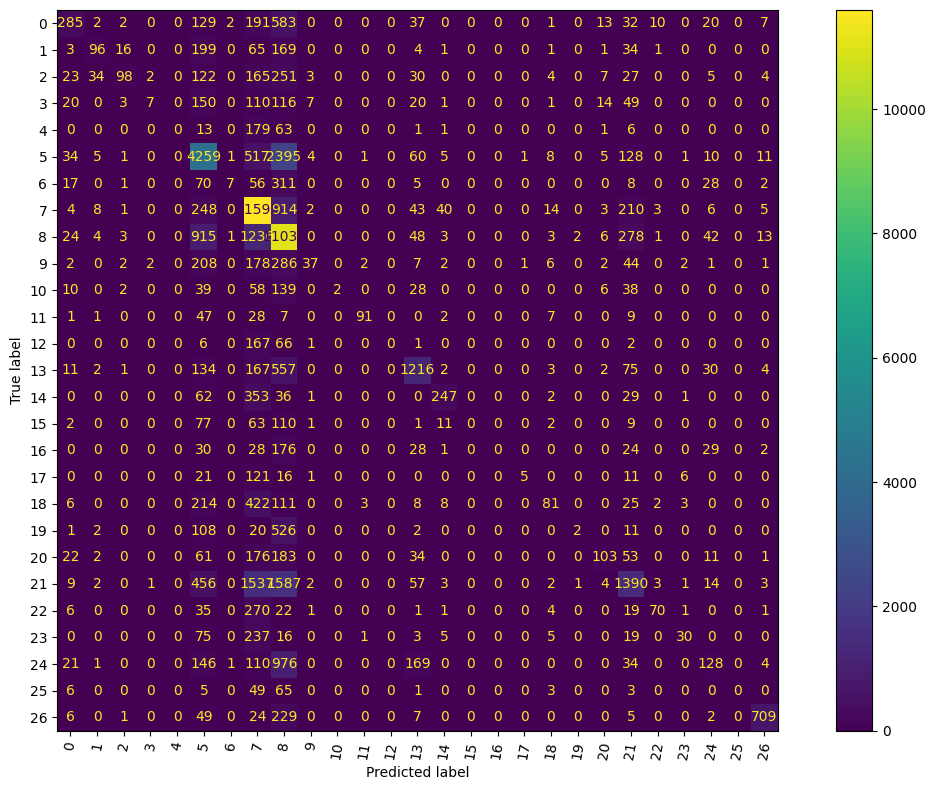

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
cm = confusion_matrix(y_test, grid_predictionslr)
cmp = ConfusionMatrixDisplay(cm, display_labels=classifierlr.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()